## Práctico 5 - Aprendizaje automático
### Parte 2: Aprendizaje no supervisado. CSV: `Clientes shopping`

1. Preprocesar los datos incluyendo la normalización de los mismos.

In [95]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, widgetsnbextension
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [96]:
df = pd.read_csv('clientes_shopping.csv')
df.info()
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
# Seleccionar columnas de interés
datos = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos)

df_datos_normalizados = pd.DataFrame(datos_normalizados, columns=datos.columns)

df_datos_normalizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID: 200
Gender: 2
Age: 51
Annual Income (k$): 64
Spending Score (1-100): 84


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [97]:
print("Datos faltantes por columna:")
print(df_datos_normalizados.isnull().sum())

print("\nNúmero de filas duplicadas:")
print(df_datos_normalizados.duplicated().sum())

Datos faltantes por columna:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Número de filas duplicadas:
0


2. Realizar los siguientes gráficos de dispersión:
   - **a.** Anual Income (k$) vs Spending Score (1-100)
   - **b.** Age vs Spending Score (1-100)
   - **c.** Age vs Anual Income (k$)


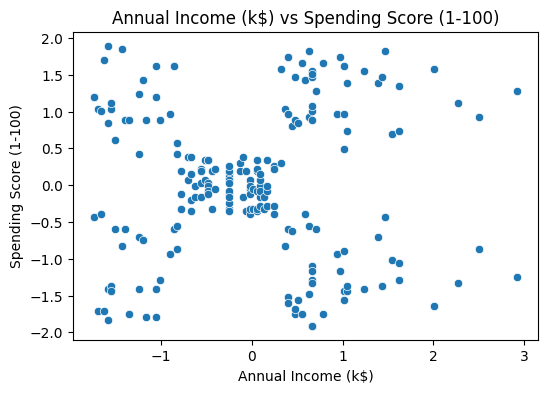

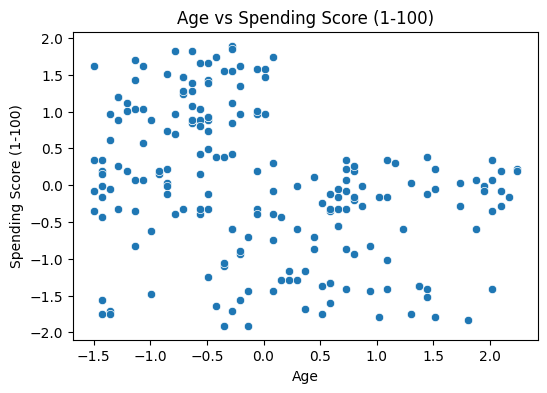

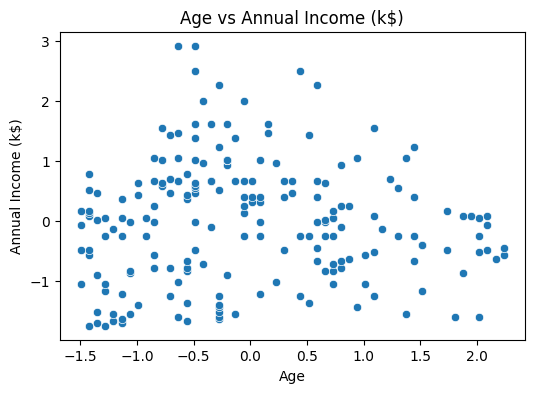

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico Anual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Annual Income (k$)'], y=df_datos_normalizados['Spending Score (1-100)'])
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

# Gráfico Age vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Age'], y=df_datos_normalizados['Spending Score (1-100)'])
plt.title("Age vs Spending Score (1-100)")
plt.show()

# Gráfico Age vs Annual Income (k$)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Age'], y=df_datos_normalizados['Annual Income (k$)'])
plt.title("Age vs Annual Income (k$)")
plt.show()


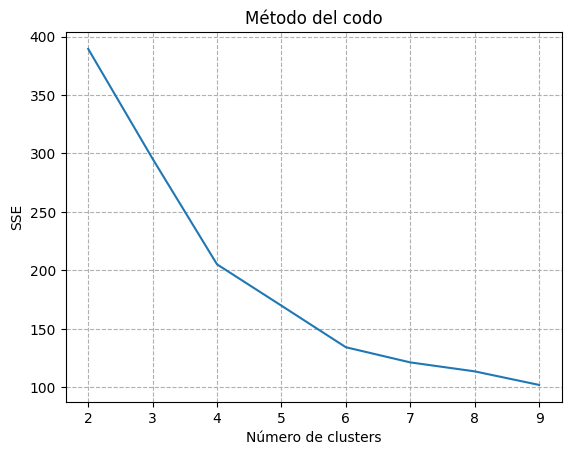

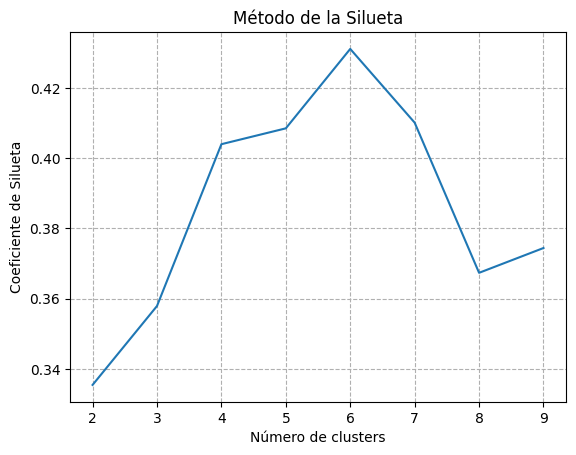

In [99]:
# Función para calcular el método del codo
def metodo_codo(data, max_clusters=10):
    sse = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(2, max_clusters), sse)
    plt.xlabel('Número de clusters')
    plt.ylabel('SSE')
    plt.title('Método del codo')
    plt.grid(linestyle='--')
    plt.show()

def metodo_silueta(data, max_clusters=10):
    silhouette = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        silhouette.append(silhouette_score(data, kmeans.labels_))
    plt.plot(range(2, max_clusters), silhouette)
    plt.xlabel('Número de clusters')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.grid(linestyle='--')
    plt.show()

metodo_codo(datos_normalizados, 10)
metodo_silueta(datos_normalizados, 10)

3. Aplicar el modelo elegido, evaluar cuál es la cantidad de clusters adecuada a 
utilizar y una medida de distancia adecuada.

>-  Para el método del codo me sirve el valor de k donde la pendiente se hace cada vez menor.
>-  Para el método de la silueta me sirve el valor de k donde el coeficiente es máximo.
$\Rightarrow$ me sirve k = 6.

4. Crear nuevamente los gráficos solicitados, esta vez coloreando los clusters 
predichos. 

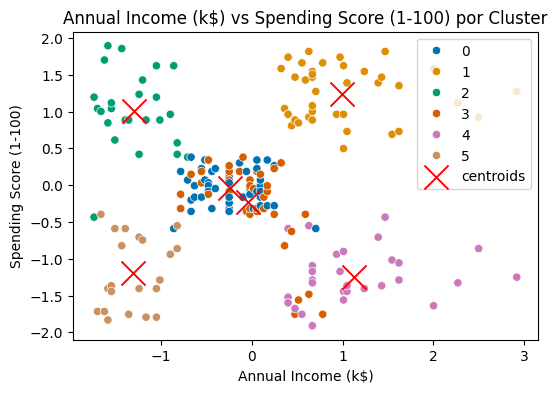

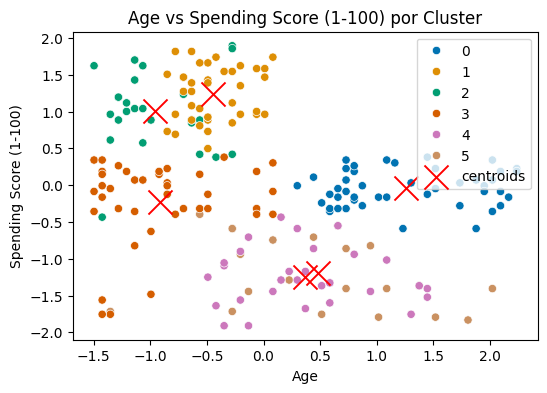

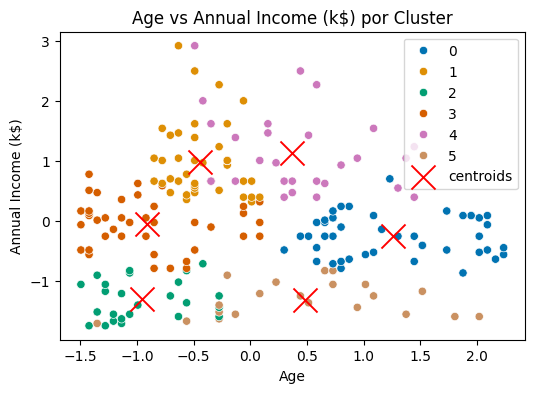

In [100]:
# Aplicar K-means con el número óptimo de clusters
k_optimo = 6  # Ajusta según los resultados obtenidos
kmeans = KMeans(n_clusters=k_optimo, random_state=42, )
df_datos_normalizados['Cluster'] = kmeans.fit_predict(datos_normalizados)

centroids = kmeans.cluster_centers_ 

# Graficar los clusters con color
# Anual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Annual Income (k$)'], y=df_datos_normalizados['Spending Score (1-100)'], hue=df_datos_normalizados['Cluster'], palette='colorblind')
sns.scatterplot(x=centroids[:, 1], y=centroids[:, 2], s=300, marker='x', c='red', label='centroids')
plt.title("Annual Income (k$) vs Spending Score (1-100) por Cluster")
plt.legend(loc='upper right')
plt.show()

# Age vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Age'], y=df_datos_normalizados['Spending Score (1-100)'], hue=df_datos_normalizados['Cluster'], palette='colorblind')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 2], s=300, marker='x', c='red', label='centroids')
plt.title("Age vs Spending Score (1-100) por Cluster")
plt.legend(loc='upper right')
plt.show()

# Age vs Annual Income (k$)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_datos_normalizados['Age'], y=df_datos_normalizados['Annual Income (k$)'], hue=df_datos_normalizados['Cluster'], palette='colorblind')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=300, marker='x', c='red', label='centroids')
plt.title("Age vs Annual Income (k$) por Cluster")
plt.legend(loc='upper right')
plt.show()


### Ploteo Interactivo: 
Como observamos que los gráficos para la parte anterior eran los mismos pero con sus ejes rotados, lo podemos visualizar mejor con un gráfico 3D.

In [101]:
import plotly.express as px 
import plotly.graph_objects as go

fig = px.scatter_3d(
    df_datos_normalizados,
    x='Annual Income (k$)',       # X-axis
    y='Spending Score (1-100)',    # Y-axis
    z='Age',                       # Z-axis
    color='Cluster',               # Color según cluster
    color_continuous_scale='Turbo',
    title="Clusterización de clientes de shopping"
)

fig.add_trace(go.Scatter3d(
    x=centroids[:, 1], 
    y=centroids[:, 2], 
    z=centroids[:, 0], 
    mode='markers', 
    marker=dict(size=10, color='black', symbol='diamond', line=dict(color='black', width=2)),
    name='Centroids'
))

fig.update_traces(marker=dict(size=5, opacity=0.7))

fig.update_layout(
    scene=dict(
        xaxis_title="Annual Income (k$)",
        yaxis_title="Spending Score (1-100)",
        zaxis_title="Age"
    ),
    width=1000,   
    height=800    
)

fig.show()

In [102]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

initial_centers = random_center_initializer(datos_normalizados, k_optimo, random_state=42).initialize()

for measure, value in distance_measures.items():

    instanceKm = kmeans(datos_normalizados, initial_centers=initial_centers, metric=distance_metric(value))

    instanceKm.process()

    pyClusters = instanceKm.get_clusters()
    pyCenters = np.array(instanceKm.get_centers())
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, datos_normalizados)
    df_datos_normalizados['Cluster'] = pyEncoder.set_encoding(0).get_clusters()

    fig = px.scatter_3d(
        df_datos_normalizados,
        x='Annual Income (k$)',       # X-axis
        y='Spending Score (1-100)',    # Y-axis
        z='Age',                       # Z-axis
        color='Cluster',               # Color según cluster
        color_continuous_scale='Turbo',
        title=f"Clusterización de clientes de shopping: {measure}"
    )

    fig.add_trace(go.Scatter3d(
        x=pyCenters[:, 1], 
        y=pyCenters[:, 2], 
        z=pyCenters[:, 0], 
        mode='markers', 
        marker=dict(size=10, color='black', symbol='diamond', line=dict(color='black', width=2)),
        name='Centroids'
    ))

    fig.update_traces(marker=dict(size=5, opacity=0.7))

    fig.update_layout(
        scene=dict(
            xaxis_title="Annual Income (k$)",
            yaxis_title="Spending Score (1-100)",
            zaxis_title="Age"
        ),
        width=1000,   
        height=800    
    )

    fig.show()